# 🤖 Model Comparison: Logistic Regression vs Random Forest vs XGBoost
This notebook evaluates and compares the performance of three models on the phishing detection task:

- **Logistic Regression**
- **Random Forest**
- **XGBoost**

We analyze classification reports, side-by-side metrics, and confusion matrices to assess which model performs best, particularly in detecting phishing websites.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [6]:
# Load classification reports and confusion matrices
with open("../metrics/metrics_lr.json", "r") as f:
    lr_metrics = json.load(f)
with open("../metrics/metrics_rf.json", "r") as f:
    rf_metrics = json.load(f)
#with open("/workspaces/phishing-flask-api/metrics/metrics_xgb.json", "r") as f:
with open("../metrics/metrics_xgb.json", "r") as f:
    xgb_metrics = json.load(f)

lr_report = pd.DataFrame(lr_metrics['classification_report']).transpose()
rf_report = pd.DataFrame(rf_metrics['classification_report']).transpose()
xgb_report = pd.DataFrame(xgb_metrics['classification_report']).transpose()

lr_cm = lr_metrics['confusion_matrix']
rf_cm = rf_metrics['confusion_matrix']
xgb_cm = xgb_metrics['confusion_matrix']

### 📄 Full Classification Reports
These reports show precision, recall, and F1-score across both classes (legitimate and phishing).

In [11]:
print("Logistic Regression Report:")
display(lr_report)

print("\nRandom Forest Report:")
display(rf_report)

print("\nXGBoost Report:")
display(xgb_report)

Logistic Regression Report:


,precision,recall,f1-score,support
0,0.909601,0.908964,0.909282,1428.000000
1,0.931217,0.931710,0.931463,1889.000000
accuracy,0.921917,0.921917,0.921917,0.921917
macro avg,0.920409,0.920337,0.920373,3317.000000
weighted avg,0.921911,0.921917,0.921914,3317.000000



Random Forest Report:


,precision,recall,f1-score,support
0,0.975469,0.946779,0.960910,1428.000000
1,0.960642,0.982001,0.971204,1889.000000
accuracy,0.966838,0.966838,0.966838,0.966838
macro avg,0.968056,0.964390,0.966057,3317.000000
weighted avg,0.967025,0.966838,0.966772,3317.000000



XGBoost Report:


,precision,recall,f1-score,support
0,0.977011,0.952381,0.964539,1428.000000
1,0.964675,0.983060,0.973781,1889.000000
accuracy,0.969852,0.969852,0.969852,0.969852
macro avg,0.970843,0.967720,0.969160,3317.000000
weighted avg,0.969986,0.969852,0.969802,3317.000000


### 📋 Side-by-Side Metrics Table (Phishing Class Only)
This table summarizes precision, recall, and F1-score for the phishing class (Label=1).

In [12]:
comparison_table = pd.DataFrame({
    'Logistic Regression': lr_report.loc['1', ['precision', 'recall', 'f1-score']],
    'Random Forest': rf_report.loc['1', ['precision', 'recall', 'f1-score']],
    'XGBoost': xgb_report.loc['1', ['precision', 'recall', 'f1-score']]
}).T
comparison_table.columns = ['Precision', 'Recall', 'F1-Score']
comparison_table = comparison_table.round(3)
comparison_table

,Precision,Recall,F1-Score
Logistic Regression,0.931,0.932,0.931
Random Forest,0.961,0.982,0.971
XGBoost,0.965,0.983,0.974


### 📊 Bar Chart Comparison
Visual comparison of phishing class metrics for all three models.

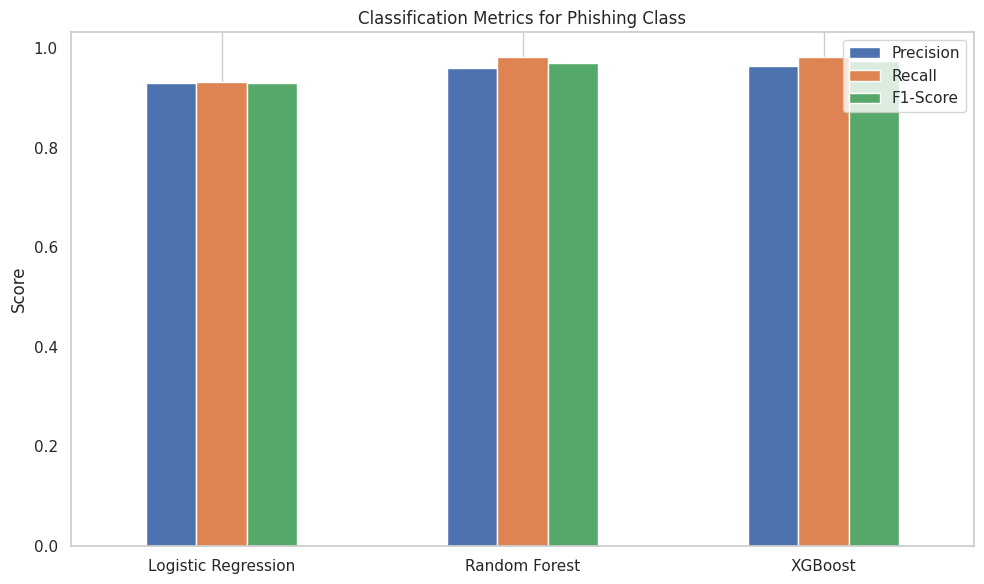

In [13]:
comparison_table.plot(kind='bar', figsize=(10,6))
plt.title("Classification Metrics for Phishing Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 📉 Confusion Matrices
These heatmaps display actual vs. predicted class performance for each model.

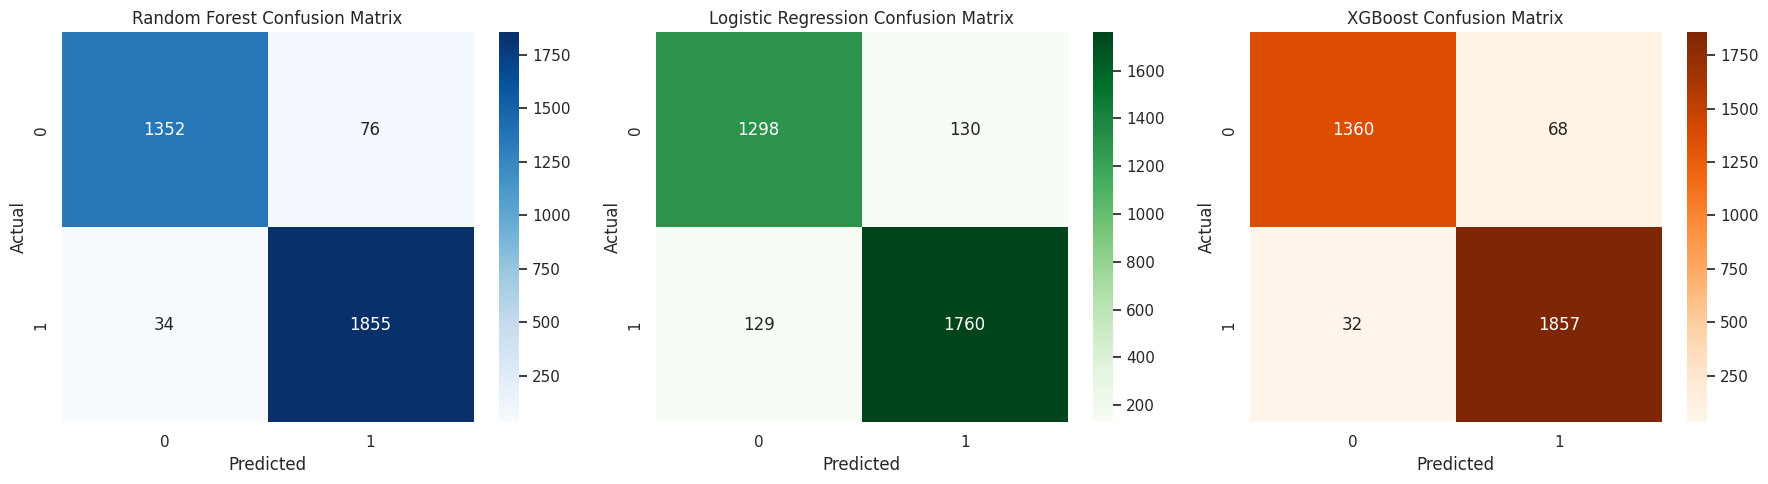

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Logistic Regression Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title("XGBoost Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()